<a href="https://colab.research.google.com/github/Whatever929/kaggle_notebook/blob/main/Visitor_ASEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cleaning the data

In [1]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
%run '/content/drive/MyDrive/Colab Notebooks/setup.ipynb'
%run '/content/drive/MyDrive/Colab Notebooks/plot_util.ipynb'

In [2]:
upload_files()

Saving visitor_asean.csv to visitor_asean.csv


In [3]:
# Original dataset can be found in https://data.aseanstats.org/visitors
original = pd.read_csv("visitor_asean.csv")
df = original.copy()

In [4]:
df.columns = df.iloc[0]
df = df.drop(0)

In [5]:
df['Destination Country'] = df['Destination Country'].fillna(method='ffill')

In [6]:
df = df.set_index(['Destination Country','Origin Country'])

In [64]:
released_version = df.astype(str).applymap(lambda x: x.replace(' ','')).astype(int, errors='ignore')

In [65]:
released_version.to_csv("visitor_asean.csv")

### Basic data analysis

In [70]:
total_by_country = released_version.loc[(slice(None), ['Total Intra-ASEAN', 'Total Country (World)', 'Total EU-28', 'Total EU-27']), :]
total_by_country.columns.set_names("Year", inplace=True)
total_by_country

Year                                           2015  ...     2020
Destination Country Origin Country                   ...         
Brunei Darussalam   Total Intra-ASEAN        118719  ...    32571
                    Total Country (World)    218213  ...    62325
                    Total EU-27                7750  ...     2034
                    Total EU-28               18879  ...      nan
Cambodia            Total Intra-ASEAN       2097758  ...   496466
                    Total Country (World)   4775231  ...  1306143
                    Total EU-27              456880  ...   137342
                    Total EU-28              611145  ...      nan
Indonesia           Total Intra-ASEAN       3860652  ...  1521447
                    Total Country (World)  10406759  ...  4052923
                    Total EU-27              883697  ...   266593
                    Total EU-28             1176442  ...      nan
Lao PDR             Total Intra-ASEAN       3588538  ...   555519
                    Total Country (World)   4684429  ...   886447
                    Total EU-27              132369  ...    37911
                    Total EU-28              173877  ...      nan
Malaysia            Total Intra-ASEAN      19146514  ...  2949363
                    Total Country (World)  25721251  ...  4332722
                    Total EU-27              585835  ...   131865
                    Total EU-28              986854  ...      nan
Myanmar             Total Intra-ASEAN       1762886  ...   493581
                    Total Country (World)   4681020  ...   903343
                    Total EU-27              156453  ...    46848
                    Total EU-28              201573  ...      nan
Philippines         Total Intra-ASEAN        481567  ...    83344
                    Total Country (World)   5360682  ...  1482535
                    Total EU-27              292723  ...   112194
                    Total EU-28              447312  ...      nan
Singapore           Total Intra-ASEAN       5748155  ...   896779
                    Total Country (World)  15231469  ...  2742443
                    Total EU-27              842294  ...   227143
                    Total EU-28             1316104  ...      nan
Thailand            Total Intra-ASEAN       7886136  ...  1652593
                    Total Country (World)  29881091  ...  6702396
                    Total EU-27             2880089  ...   905300
                    Total EU-28             3827008  ...      nan
Viet Nam            Total Intra-ASEAN       1300839  ...   509327
                    Total Country (World)   7943651  ...  3686779
                    Total EU-27              598205  ...   237514
                    Total EU-28              811003  ...      nan

[40 rows x 6 columns]

In [71]:
total_by_country = total_by_country.stack('Year').unstack("Destination Country")
total_by_country

Destination Country        Brunei Darussalam Cambodia  ...  Thailand  Viet Nam
Origin Country        Year                             ...                    
Total Intra-ASEAN     2015            118719  2097758  ...   7886136   1300839
                      2016            117525  2121220  ...   8897291   1461172
                      2017            131351  2161254  ...   9322508   1683524
                      2018            134596  2067504  ...  10191391   1781327
                      2019            168705  2228185  ...  10751957   2037257
                      2020             32571   496466  ...   1652593    509327
Total Country (World) 2015            218213  4775231  ...  29881091   7943651
                      2016            218809  5011712  ...  32529588  10012735
                      2017            258955  5602157  ...  35591978  12922151
                      2018            278136  6201077  ...  38178194  15497791
                      2019            333244  6610592  ...  39916251  18008591
                      2020             62325  1306143  ...   6702396   3686779
Total EU-27           2015              7750   456880  ...   2880089    598205
                      2016              6941   458431  ...   3002656    701616
                      2017              7581   552946  ...   3100007    781232
                      2018              7338   521914  ...   3187338    857394
                      2019              5884   509996  ...   3104517    898348
                      2020              2034   137342  ...    905300    237514
Total EU-28           2015             18879   611145  ...   3827008    811003
                      2016             17301   617920  ...   3964127    956457
                      2017             19673   724108  ...   4094762   1064769
                      2018             19304   684309  ...   4174192   1155508
                      2019             20082   673173  ...   4097003   1213432
                      2020               nan      nan  ...       nan       nan

[24 rows x 10 columns]

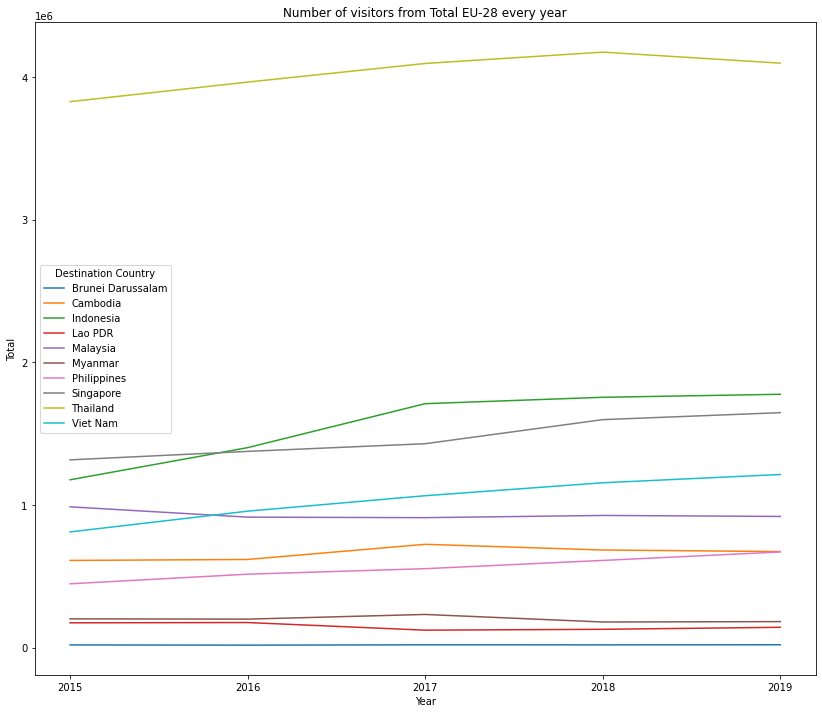

In [51]:
def plot_by_year(df, origin_country):
  plt.figure(figsize=(14, 12))
  total_by_year = total_by_country.loc[origin_country]
  total_by_year = total_by_year.stack().rename('Total').reset_index()
  total_by_year['Total'] = total_by_year['Total']
  ax = sns.lineplot(data=total_by_year, x='Year', y='Total', hue='Destination Country')
  ax.set_title(f"Number of visitors from {origin_country} every year")

plot_by_year(total_by_country, "Total EU-28")

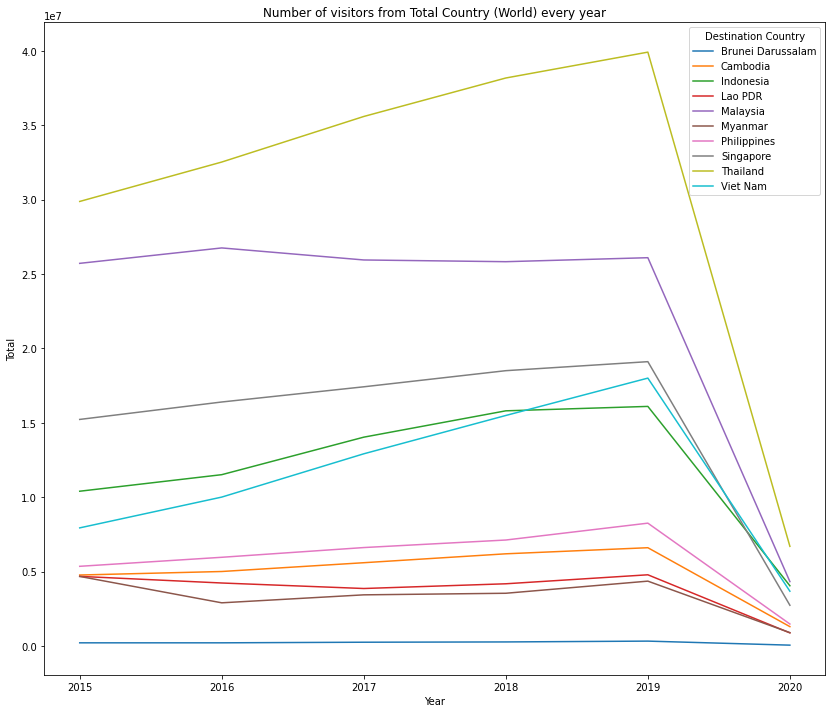

In [52]:
plot_by_year(total_by_country, "Total Country (World)")